# Geometry of Data HW 1
#### Rohan Nair
#### 9/14/21
#### rrn7dx@virginia.edu

### Problem 1


Let $\mathcal{B} = \{[a,b] : a < b\}$

From its definition, we know that the basis for a topology on a set $X$ is a collection $\mathcal{B}_X$ of subsets of $X$ such that: 
1. For each $x \in X$ there exists a $B \in \mathcal{B}_X$ containing $x$
2. If $B_1, B_2 \in \mathcal{B}_X$ and $x \in B_1 \cap B_2$, then there exists a $B_3 \subset B_1 \cap B_2$ in $\mathcal{B}_X$ such that $x \in B_3$. 

If $X = \mathbb{R}$, condition 1 is satisfied by by $\mathcal{B}$ since every point in the real line can be encapsulated in some closed interval. Condition 2 however is violated by the following counter-example:

Let $B_1 = [1,3]$, $B_2 = [3,4]$, and $x=3$. As we can see, $x \in B_1$ and $x \in B_2$. Then let $B_3 = B_1 \cap B_2 = [3,3]$. For $\mathcal{B}$ to be the basis for a topology, $B_3$ must be an element of $\mathcal{B}$, but since 3 = 3, $B_3$ violates the condition that $a < b$ so it is not in $\mathcal{B}$. Therefore, $\mathcal{B}$ is not a valid basis for a topology on $\mathbb{R}$. 

### Problem 2

Given a metric space $X$ with metric $d: X \times X \to \mathbb{R}$ and a subset $A \subset X$, show that metric rescricted to $A, d|_{A\times A}$ gives the same topology as the subspace topology on $A$

We can approach this problem by proving that the intersection of the basis $\mathcal{B}$ for a topological space $X$ with a subspace $A \subset X$ is indeed the basis for a topology on $A$. 

As stated in the previous problem, the definition of a basis for a topology on a set $X$ is a collection $\mathcal{B}_X$ of subsets of $X$ such that: 
1. For each $x \in X$ there exists a $B \in \mathcal{B}_X$ containing $x$
2. If $B_1, B_2 \in \mathcal{B}_X$ and $x \in B_1 \cap B_2$, then there exists a $B_3 \in \mathcal{B}_X$ such that $B_3 \subset B_1 \cap B_2$ and $x \in B_3$. 


Let $A$ be a subspace of a topological space $X$, with basis $\mathcal{B}$. The set $\{B\cap A : B \in \mathcal{B} \}$ forms a basis for the subspace topology of $A$ because it satisfies both of the above conditions for a basis: 

1. Every element $a \in A$ is contained in an element $B \in \mathcal{B}$ because $A \subset X$ and $X \in \mathcal{B}$ according the definition of the basis for the topology of $X$.

2. Let $a \in B_1 \cap B_2$. Since $B_1$ and $B_2$ are open, so is their interesction. Therefore, there must exist an element $B_3$ in $\mathcal{B}$ such that $a \in B \in U$, where $U$ is an open set on the topology of $X$.

Now that we have established that the interesction of the basis for the topological space $B$ with the subspace $A$ is the basis for a subspace topology on $A$, we can proceed by understanding that the distance function of a metric space can be used to alternatively define a basis for a topology on some set $X$ as the collection of open balls $B(x,r) = \{y \in X : d(x,y) < r\}$. 

Since we can define a valid basis for $A$ in this manner and we know that $X$ is a metric space with metric $d: X \times X \to \mathbb{R}$ and that $A \subset X$, we know that the basis for the topology on $X$ defined by $d|_{A\times A}$, the metric space restricted to $A$, or in other words, $A$ intersected with the larger metric space $X$, defines a basis for a topology on $A$. We can simply substitute this basis for the original one that resulted from our above proof and all the same properties still hold. 


### Problem 3a

In order to solve this problem, I began by using latitude and longitude. I randomly chose a longitude in the range $[-\pi, \pi]$ and keeping that longitude constant, I used $\texttt{np.linspace}$ to obtain 100 points along that longitudinal line in the range $[-\pi/2, \pi/2]$. I converted each pair of latitude and longitude to cartesian coordinates and then performed the stereographic projection onto the $z=0$ plane. The result is lines that pass through the origin, $(0,0)$. 

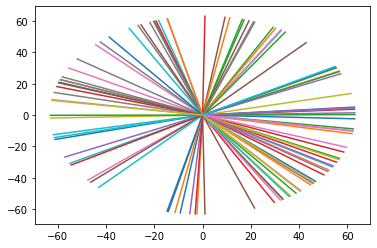

In [11]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt

def stereo_proj(x, y, z):
    x_res,y_res = x/(1-z), y/(1-z)
    return x_res,y_res

# longitudinal lines

for i in range(100):
    # keeping longitude constant, varying latitude
    lon = random.uniform(-math.pi, math.pi)
    lats = np.linspace(-math.pi/2, math.pi/2, 100)

    x_coordinates = []
    y_coordinates = []
    # converting to cartesian coordinates
    for lat in lats:
        x = math.cos(lat) * math.cos(lon)
        y = math.cos(lat) * math.sin(lon)
        z = math.sin(lat)
        # can't project north pole
        if z != 1:
            # finding stereographic projection
            stereo_x, stereo_y = stereo_proj(x, y, z)
            x_coordinates.append(stereo_x)
            y_coordinates.append(stereo_y)

    plt.plot(x_coordinates, y_coordinates)


### Problem 3b

I used the same process detailed in 3a but this time I kept latitude constant and varied the longitude to get points along the same latitudinal line. The result is concentric circles centered around $(0,0)$. 

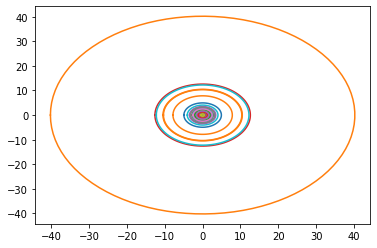

In [3]:
# latitudinal lines

for i in range(100):
    # keeping latitude constant, varying longitude
    lat = random.uniform(-math.pi/2, math.pi/2)
    lons = np.linspace(-math.pi, math.pi, 100)

    x_coordinates = []
    y_coordinates = []
    # converting to cartesian coordinates
    for lon in lons:
        x = math.cos(lat) * math.cos(lon)
        y = math.cos(lat) * math.sin(lon)
        z = math.sin(lat)
        # can't project north pole
        if z != 1:
            # finding stereographic projection
            stereo_x, stereo_y = stereo_proj(x, y, z)
            x_coordinates.append(stereo_x)
            y_coordinates.append(stereo_y)

    plt.plot(x_coordinates, y_coordinates)

### Problem 3c

In order to find points along arbitrary great circles, I started with the latitude and longitude of the equator and used $\texttt{scipy}$ to perform rotations on the equator using Euler angles. The result is non-concentric circles as seen below.

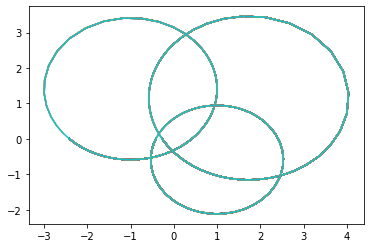

In [4]:
# arbitrary great circles

from scipy.spatial.transform import Rotation as R

# latitude of equator
lat = 0
lons = np.linspace(-math.pi, math.pi, 100)

# initializing 3 transformations using euler angles
r1 = R.from_euler('xy', [math.pi/4, math.pi/4])
r2 = R.from_euler('xy', [math.pi/6, -math.pi/3])
r3 = R.from_euler('xy', [-math.pi/8, -math.pi/4])

rots = [r1, r2, r3]

for rot in rots:
    x_coordinates = []
    y_coordinates = []
    for lon in lons:
            # converting to cartesian coordinates
            pt = [math.cos(lat) * math.cos(lon), math.cos(lat) * math.sin(lon), math.sin(lat)]
            # applying transformation
            x, y, z = rot.apply(pt)
            # stereographic projection
            stereo_x, stereo_y = stereo_proj(x, y, z)
            x_coordinates.append(stereo_x)
            y_coordinates.append(stereo_y)
            plt.plot(x_coordinates, y_coordinates)

### Problem 4a

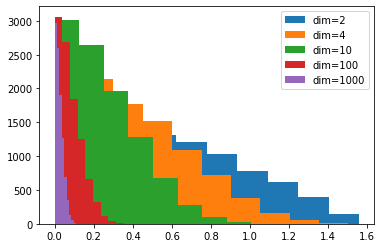

In [9]:
mu, sigma = 0, 1
dims = [2, 4, 10, 100, 1000]
for dim in dims:
    arc_lengths = []
    for i in range(10000):
        # randomly generating points
        p_i = np.random.normal(mu, sigma, dim+1)
        # projecting onto unit sphere
        p_i_unit = p_i/np.linalg.norm(p_i)
        # setting x_(d+1) = 0 to get vector along great circle equator
        p_0 = p_i_unit
        p_0[-1] = 0
        # using dot product to calculate angle (arc length)
        theta = math.acos(np.dot(p_i_unit, p_0)/np.linalg.norm(p_0))
        arc_lengths.append(theta)

    plt.hist(arc_lengths, label='dim='+str(dim))
    plt.legend()


As we can see from the histograms above, when the number of dimensions increases, the arc length between any randomly generated unit vector on the $d$-dimensional sphere and the equator tends to zero. This makes sense because the vector along the great circle equator is found by simply 'collapsing' a dimension of our unit-vector on the $d$-dimensional sphere. We are doing this by setting $x_d+1 = 0$. All of the other values $x_i$ where $0 \leq i \leq d$ remain the same and therefore do not contribute to the distance/arc length. This result shows that randomly generated points in high-dimensional space tend to lie close to the hyperplane equator. This makes sense because as discussed in class, as we move to higher dimensional spaces, we see distances begin to converge, resulting in "spikes" when we represent distances via a histogram. I would expect this result to be similar for aribtrary great circles that are not necessarily axis-aligned since they are essentially the equator with some rotation(s) applied to them so the same principle will hold. 

### Problem 4b

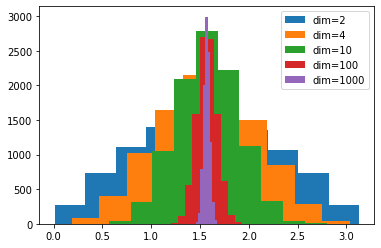

In [10]:
mu, sigma = 0, 1
dims = [2, 4, 10, 100, 1000]
for dim in dims:
    angles = []
    for i in range(10000):
        # randomly generating points
        p_1 = np.random.normal(mu, sigma, dim+1)
        # projecting onto unit sphere
        p_1_unit = p_1/np.linalg.norm(p_1)
        p_2 = np.random.normal(mu, sigma, dim+1)
        p_2_unit = p_2/np.linalg.norm(p_2)
        theta = math.acos(np.dot(p_1_unit, p_2_unit))
        angles.append(theta)
    plt.hist(angles, label='dim='+str(dim))
    plt.legend()

The angle between randomly generated pairs of vectors on our $d$-dimensional unit sphere tends to $\pi/2$ as $d$ increases. This means that as the number of dimensions goes towards infinity, pairs of randomly generated vectors are almost certain to be orthogonal. 